In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB # naive bayes multinomial para clasificación
from sklearn.naive_bayes import GaussianNB # naive bayes gausiano para clasificación
from sklearn.metrics import accuracy_score # métrica de evaluación
from sklearn.metrics import classification_report


# Análisis Exploratorio

In [2]:
df_50 = pd.read_csv('sample_data/adult.csv')
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'target']
df_50.columns = col_names
df_50.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# verificamos los tipos de datos
df_50.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
target            object
dtype: object

In [ ]:
#df_nasa.drop(['Close Approach Date','Orbiting Body','Orbit Determination Date','Equinox'],axis=1)

In [4]:
print("Tamaño del dataframe : {}".format(df_50.shape))

Tamaño del dataframe : (17188, 15)


In [5]:
# Verificamos si hay valores nulos para imputar
df_50.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            1
dtype: int64

target
 <=50K    13077
 >50K      4110
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

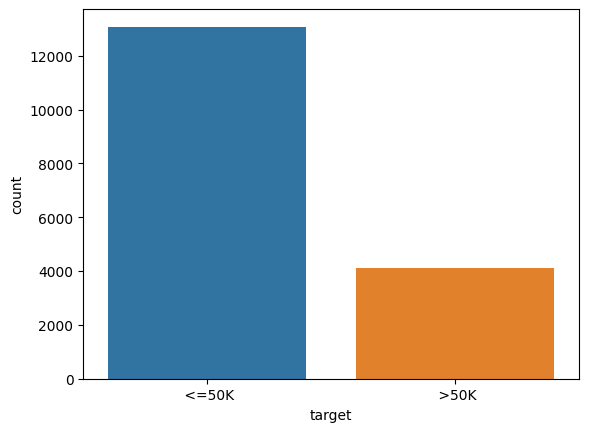

In [6]:
# Analisis de la distribución de la variable target
print( df_50.target.value_counts() )
sns.countplot(x='target', data=df_50, hue='target', legend=False)

In [7]:
# identificamos las variables categóricas
categorical = [var for var in df_50.columns if df_50[var].dtype=='O']
print('las variables categoricas son:\n', categorical)
print("\nchequeamos la dimensionalidad de las variables")
for var in categorical:
    print(len(df_50[var].unique()), ' valores unicos en ', var )

las variables categoricas son:
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'target']

chequeamos la dimensionalidad de las variables
9  valores unicos en  workclass
16  valores unicos en  education
7  valores unicos en  marital_status
15  valores unicos en  occupation
6  valores unicos en  relationship
5  valores unicos en  race
2  valores unicos en  sex
42  valores unicos en  native_country
3  valores unicos en  target


In [8]:
# paso target a una variable numerica
df_50['target'] = df_50['target'].apply(lambda x: 1 if x == ' >50K' else 0 )

In [10]:
# identificamos las variables numéricas
numerical = [var for var in df_50.columns if df_50[var].dtype!='O']
print('las variables numéricas son:\n', numerical)

las variables numéricas son:
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'target']


# Correlación de Variables

<Axes: >

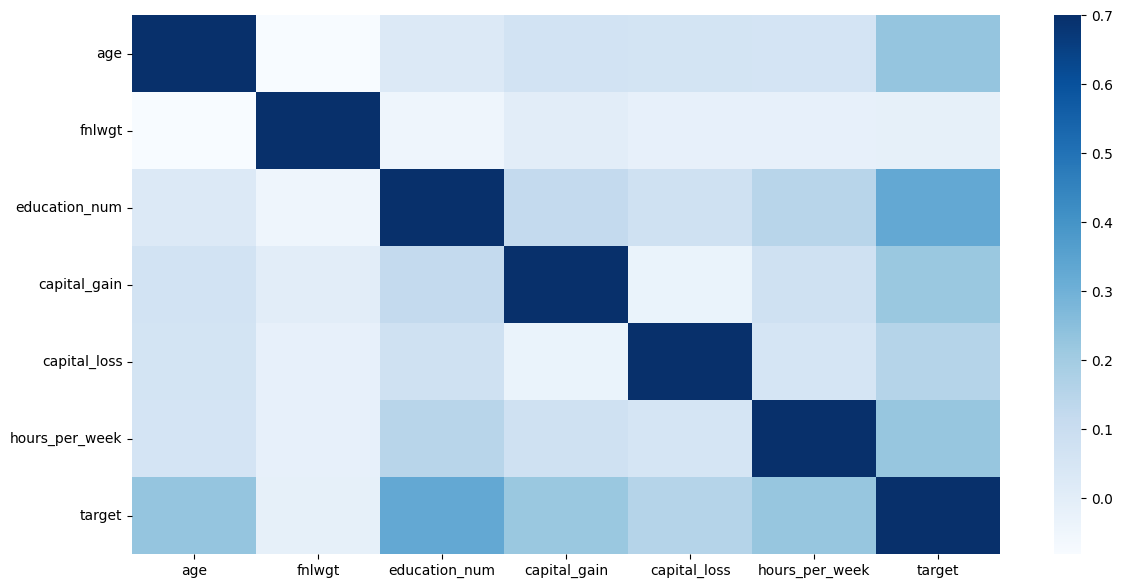

In [11]:
plt.figure(figsize=(14,7))
sns.heatmap(df_50[numerical].corr(), vmax=.7, cmap ='Blues', fmt=".2f")

In [12]:
df_corr = df_50[numerical].corr()[["target"]]*100 # lo pasamos a porcentajes
df_corr = df_corr.drop("target", axis=0) # eliminamos la variable target
df_corr = abs(df_corr) # nos interesa el valor absouluto
df_corr = df_corr.sort_values(["target"], ascending=False) # ordenamos en forma descendente
df_corr

,target
education_num,32.899984
age,22.982995
hours_per_week,22.599364
capital_gain,21.884398
capital_loss,15.391580
fnlwgt,1.207925


# Seleccionamos las variables que vamos a utilizar y hacemos el Split

In [13]:
df_50.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'target'],
      dtype='object')

In [52]:
# usamos todas las columnas numércias
df = df_50[numerical]
#X = pd.get_dummies(df.drop("target",axis=1), dtype=int)
X = df.drop("target",axis=1)
y = df["target"]
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [53]:
# Hacemos el Split 70-30 para train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [54]:
# Creamos y entrenamos el clasificador bayesiano
bayes_multi = MultinomialNB()
bayes_multi.fit(X_train, y_train) # entrenamos el clasificador

MultinomialNB()

In [55]:
y_pred_nb = bayes_multi.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_nb)*100))
print("-"*100)

# Reporte del clasificador
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

Exactitud (accuracy) del modelo: 78.55 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      3924
           1       0.62      0.26      0.37      1233

    accuracy                           0.79      5157
   macro avg       0.71      0.61      0.62      5157
weighted avg       0.76      0.79      0.75      5157



# Ejercicio
- reemplazar MultinomialNB por GaussianNB y comparar el desempeño
- usando pd.get_dummies() en las variables categóricas de baja dimensionalidad, obtener columnas numericas para representarlas. incluirlas al modelo y comparar el resultado